In [1]:
# Dataset Check

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils._resnet import resnet18_8
from utils._gradcam import _save_dataset_gradcam
from utils._erasing_method import _gradcam_occlusion_results_trajwise, _erasing_method_vis

In [2]:
## noiseless data 10~1000 length Grad-CAM - For Erasing Method
dataset_path = f"./dataset_noiseless/test/0.npy"
model_path="./model_backups/resnet18_8_b64_lr0.0001_noiseless/checkpoint.pt"
_ = _save_dataset_gradcam(dataset_path, model_path, tag=f"test_0-noiseless")

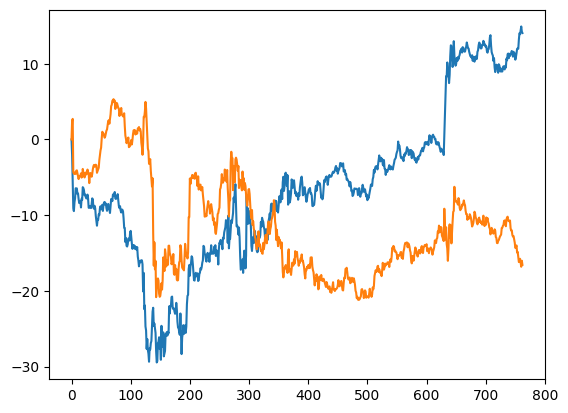

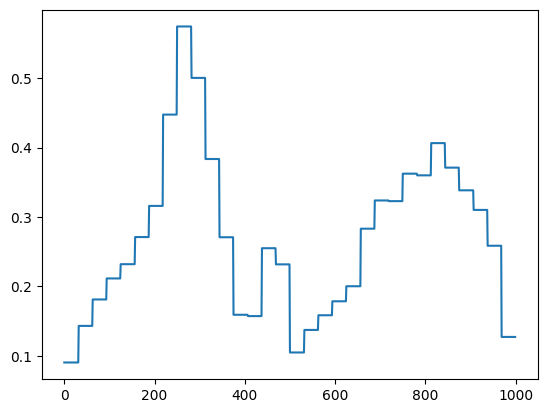

In [6]:
dataset = np.load(f"./dataset_noiseless/test/{0}.npy", allow_pickle=True)
plt.plot(dataset[0][0][0].T)
plt.show()
gradcam = np.array(np.load(f"./Grad-CAM/GradCAM-Residual-test_0-noiseless.npy"))[:]
plt.plot(gradcam[0])
plt.show()

In [7]:
model_path = f"./model_backups/resnet18_8_b64_lr0.0001_noiseless/checkpoint.pt"
if os.path.exists(model_path):
    model = resnet18_8()
    model.load_state_dict(torch.load(model_path), strict=False)
    model.eval()

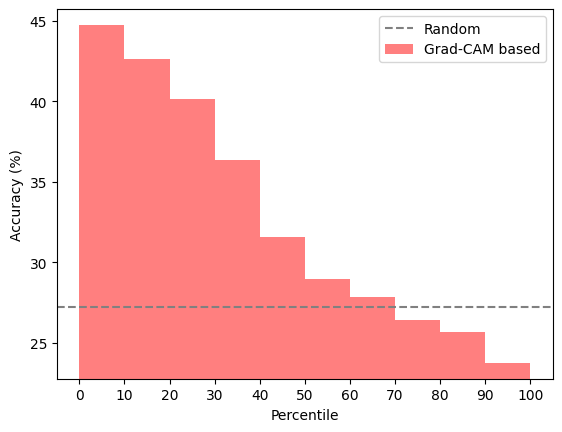

In [8]:
p1s = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
p2s = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


for p1, p2 in zip(p1s, p2s):
    _gradcam_occlusion_results_trajwise(dataset, gradcam, model, tag="", p1=p1, p2=p2)
_erasing_method_vis(p1s, p2s)